In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Customer_churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Exploration

In [3]:
#drop the 'customer id' column as it is not useful 
df.drop(labels='customerID',axis='columns',inplace=True)

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# total charges has object data type
df['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
df['MonthlyCharges'].values

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [7]:
# convert TotalCharges into float datatype
# pd.to_numeric(df.TotalCharges)

# this column has ' ',so we need to remove this

In [8]:
# this will convert the column into float and whenever there is a space it will put there NA
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [9]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
# shape of dataframe
df.shape

(7043, 20)

In [11]:
# check the specific row
df.iloc[488]['TotalCharges']

' '

In [12]:
# we can drop these 11 rows , as it will not affect much, and make a new dataframe
df1 = df[df.TotalCharges != ' ']

In [13]:
df1.shape

(7032, 20)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [15]:
# after removing spaces from the 'Total charges' now convert to float data type
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\nishc\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
df1.TotalCharges.dtypes

dtype('float64')

# Data Visualization

In [17]:
# checking the tenure column(as it tells us that the customer is loyal or not)

# tenure of the customer who are not leaving
tenure_churn_no = df1[df1.Churn == 'No'].tenure

# # tenure of the customer who are leaving
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

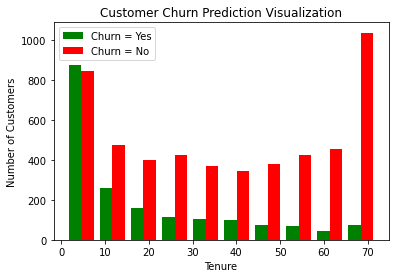

In [18]:
plt.hist([tenure_churn_yes , tenure_churn_no],color=['green','red'],
        label=['Churn = Yes' , 'Churn = No'])
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')
plt.legend()

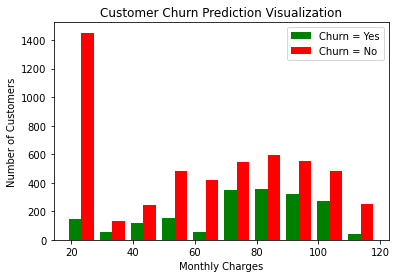

In [19]:
# check for monthly charges column because it can be very high and customer can leave

# monthly charges of the customer who are not leaving
monthly_Charges_churn_no = df1[df1.Churn == 'No'].MonthlyCharges

# monthly charges of the customer who are leaving
monthly_Charges_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.title('Customer Churn Prediction Visualization')

plt.hist([monthly_Charges_churn_yes , monthly_Charges_churn_no],color=['green','red'],
        label=['Churn = Yes' , 'Churn = No'])

plt.legend()

# Data Cleaning

In [20]:
# this functions returns the unique values of all the columns
def print_unique_values(df):
    for column in df:
        print(f'column name is {column} with Unique Values:{df[column].unique()}')
        print('='*35)

In [21]:
print_unique_values(df=df1)

column name is gender with Unique Values:['Female' 'Male']
column name is SeniorCitizen with Unique Values:[0 1]
column name is Partner with Unique Values:['Yes' 'No']
column name is Dependents with Unique Values:['No' 'Yes']
column name is tenure with Unique Values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column name is PhoneService with Unique Values:['No' 'Yes']
column name is MultipleLines with Unique Values:['No phone service' 'No' 'Yes']
column name is InternetService with Unique Values:['DSL' 'Fiber optic' 'No']
column name is OnlineSecurity with Unique Values:['No' 'Yes' 'No internet service']
column name is OnlineBackup with Unique Values:['Yes' 'No' 'No internet service']
column name is DeviceProtection with Unique Values:['No' 'Yes' 'No internet service']
column name is TechSupport with Unique Value

In [22]:
# replace 'No internet service' with 'no' as it is same thing
df1.replace('No internet service','No',inplace=True)

C:\Users\nishc\anaconda3\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [23]:
# replace 'No phone service' with 'no' as it is same thing
df1.replace('No phone service','No',inplace=True)

In [24]:
print_unique_values(df=df1)

column name is gender with Unique Values:['Female' 'Male']
column name is SeniorCitizen with Unique Values:[0 1]
column name is Partner with Unique Values:['Yes' 'No']
column name is Dependents with Unique Values:['No' 'Yes']
column name is tenure with Unique Values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column name is PhoneService with Unique Values:['No' 'Yes']
column name is MultipleLines with Unique Values:['No' 'Yes']
column name is InternetService with Unique Values:['DSL' 'Fiber optic' 'No']
column name is OnlineSecurity with Unique Values:['No' 'Yes']
column name is OnlineBackup with Unique Values:['Yes' 'No']
column name is DeviceProtection with Unique Values:['No' 'Yes']
column name is TechSupport with Unique Values:['No' 'Yes']
column name is StreamingTV with Unique Values:['No' 'Yes']
column name

In [25]:
# converting the columns with 'yes' and 'no' values with 1 and 0 respectively
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity',
                  'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                  'PaperlessBilling','Churn']

for col in yes_no_columns:
    df1[col].replace({'Yes':1,'No':0},inplace = True)
    print(df1[col])

C:\Users\nishc\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


0       1
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    1
7042    0
Name: Partner, Length: 7032, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    1
7041    0
7042    0
Name: Dependents, Length: 7032, dtype: int64
0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7032, dtype: int64
0       0
1       0
2       0
3       0
4       0
       ..
7038    1
7039    1
7040    0
7041    1
7042    0
Name: MultipleLines, Length: 7032, dtype: int64
0       0
1       1
2       1
3       1
4       0
       ..
7038    1
7039    0
7040    1
7041    0
7042    1
Name: OnlineSecurity, Length: 7032, dtype: int64
0       1
1       0
2       1
3       0
4       0
       ..
7038    0
7039    1
7040    0
7041    0
7042    0
Name: OnlineBackup, Length: 7032, dtype: int64
0       0
1       1
2       0
3       1
4       0
       ..
70

In [26]:
print_unique_values(df=df1)

column name is gender with Unique Values:['Female' 'Male']
column name is SeniorCitizen with Unique Values:[0 1]
column name is Partner with Unique Values:[1 0]
column name is Dependents with Unique Values:[0 1]
column name is tenure with Unique Values:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
column name is PhoneService with Unique Values:[0 1]
column name is MultipleLines with Unique Values:[0 1]
column name is InternetService with Unique Values:['DSL' 'Fiber optic' 'No']
column name is OnlineSecurity with Unique Values:[0 1]
column name is OnlineBackup with Unique Values:[1 0]
column name is DeviceProtection with Unique Values:[0 1]
column name is TechSupport with Unique Values:[0 1]
column name is StreamingTV with Unique Values:[0 1]
column name is StreamingMovies with Unique Values:[0 1]
column name is Con

In [27]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [28]:
# some columns has 3 categories , so we are using 1 hot encoding
pd.get_dummies(data=df1,columns=['InternetService'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,One year,0,Mailed check,56.95,1889.50,0,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,One year,1,Mailed check,84.80,1990.50,0,1,0,0
7039,1,0,1,1,72,1,1,0,1,1,...,1,One year,1,Credit card (automatic),103.20,7362.90,0,0,1,0
7040,1,0,1,1,11,0,0,1,0,0,...,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,0,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,Month-to-month,1,Mailed check,74.40,306.60,1,0,1,0


In [29]:
# doing same for contract and payment method
df2 = pd.get_dummies(data=df1,columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [30]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [31]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
# scale the columns (because some columns are in range 0 and 1)
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [33]:
df2.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
789,0,0,0,0,1.000000,1,1,1,1,1,...,1,0,0,0,0,1,1,0,0,0
5142,1,0,0,0,0.915493,1,1,1,1,1,...,0,1,0,0,1,0,1,0,0,0
1798,0,0,0,0,0.478873,1,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0


In [34]:
print_unique_values(df2)

column name is gender with Unique Values:[1 0]
column name is SeniorCitizen with Unique Values:[0 1]
column name is Partner with Unique Values:[1 0]
column name is Dependents with Unique Values:[0 1]
column name is tenure with Unique Values:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0

# Splitting the data into train and test

In [35]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [37]:
X_train.shape

(5625, 26)

In [38]:
X_test.shape

(1407, 26)

In [39]:
len(X_train.columns)

26

In [40]:
import tensorflow as tf
from tensorflow import keras

# create a NN
model = keras.Sequential([
    # 1st layer
    keras.layers.Dense(units=20,input_shape=(26,),activation='relu'),
    
    # output layer
    keras.layers.Dense(units=1,activation='sigmoid')
    
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 2s 3ms/step - loss: 0.5483 - accuracy: 0.7168
Epoch 2/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4501 - accuracy: 0.7856
Epoch 3/50
176/176 [==============================] - 1s 3ms/step - loss: 0.4301 - accuracy: 0.7936
Epoch 4/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4215 - accuracy: 0.7972
Epoch 5/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4175 - accuracy: 0.7996
Epoch 6/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4145 - accuracy: 0.8030
Epoch 7/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4121 - accuracy: 0.8078
Epoch 8/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8089
Epoch 9/50
176/176 [==============================] - 0s 3ms/step - loss: 0.4105 - accuracy: 0.8092
Epoch 10/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4095 - accuracy: 0.8101

In [41]:
model.evaluate(X_test,y_test)
# around 79% accuracy

44/44 [==============================] - 0s 2ms/step - loss: 0.4470 - accuracy: 0.7882


[0.44703149795532227, 0.7882018685340881]

In [42]:
yp = model.predict(X_test)
yp[:5]

array([[0.216943  ],
       [0.45289376],
       [0.0087111 ],
       [0.7648337 ],
       [0.65435266]], dtype=float32)

In [43]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [44]:
# convert 'yp' from 2D to 1D array as y_test is 1D
# Also convert all values in yp to either 1 or 0 

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]     

[0, 0, 0, 1, 1, 1, 0, 1, 0, 0]

In [45]:
# check the performance of the model
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       999
           1       0.66      0.56      0.60       408

    accuracy                           0.79      1407
   macro avg       0.74      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(69.0, 0.5, 'Actual')

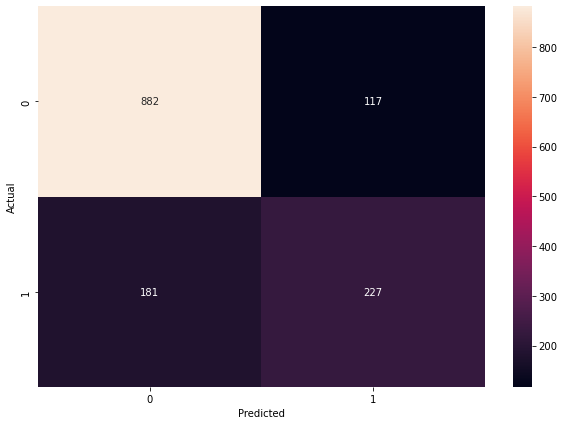

In [46]:
# confusion matrix
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [48]:
print('Accuracy:',round((882+227)/(882+117+227+181),2))

Accuracy: 0.79
